In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
original = pd.read_csv("../data/original (5).csv")

# How can we predict and mitigate customer churn using machine learning techniques?

## Develop a machine learning model to predict the likelihood of customer churn.

In [19]:
original['Churn'] = original['Attrition_Flag'].apply(lambda x: 'No' if x == 'Existing Customer' else 'Yes')
ori = original.copy()
ori = original.drop(columns = ['Attrition_Flag'])

In [23]:
total_customers = ori['Churn'].count()
churners = ori[ori['Churn'] == 'Yes'].shape[0]
churn_rate = churners / total_customers * 100
print(f"The Churn Rate is quite high at {churn_rate:.2f}%.")

The Churn Rate is quite high at 16.07%.


### Likelihood of Churning for each customer

#### Preparing the data

In [28]:
np.random.seed(10)

# encoding 'Income_Category', 'Product_Usage', 'Cluster_Labels' and 'Churn' to numerical formats
encoders = {}
for c in ['Gender', 'Income_Category', 'Education_Level', 'Marital_Status', 'Product_Usage', 'Card_Category'
          , 'Cluster_Labels', 'Churn']:
    le = LabelEncoder()
    ori[c] = le.fit_transform(ori[c])
    encoders[c] = le

# splitting the data into training and test
## training data size: 80%; test data size: 20%
X = ori.drop(columns = ['Churn'])
y = ori['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Random Forest Classifier

To add Churn_Probability to the data.

In [31]:
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
churn_probabilities = model.predict_proba(X)[:, 1]

# add likelihood of a customer churning into the dataset
original['Churn_Probability'] = churn_probabilities

#### Testing viability

##### Accuracy and F1 scores

In [36]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 score: {f1:.4f}")

Accuracy: 0.9427
F1 score: 0.8041


The accuracy is quite high at 94.27%. This shows that the model accurately classifies the customer into churned or not churned 94.27% of the time. However, this should not be trusted because most people did not churn (83.93%) in the data.

The F1 score is relatively high 80.41%. It is average of precision and recall and both of these contribute equally to the F1 score (Sharma, 2023). The model as a modest ability in predicting true positives (customers who actually churn). 

##### AUC - ROC 

AUC-ROC score: 0.9727


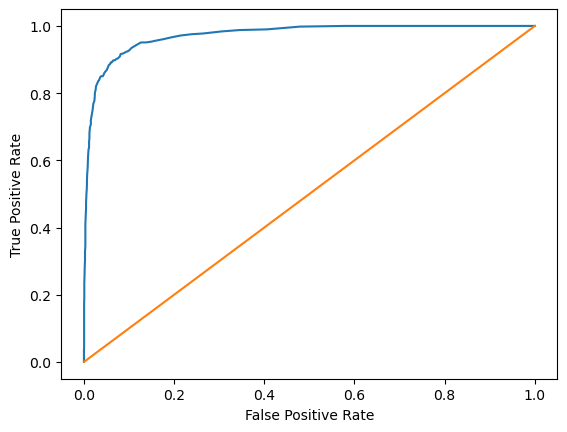

In [40]:
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC score: {auc:.4f}")

# plotting the AUC-ROC
false_pos_r, true_pos_r, thresholds = roc_curve(y_test, y_prob)
plt.plot(false_pos_r, true_pos_r)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The AUC-ROC score is high at 97.27%. The model has significant in predicting the likelihood of a customer churning. The model correctly classifies with a probability of 97.27%.